# Importaciones

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sb

# importamos el algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


# importamos las funciones que nos permiten calcular las métricas de rendimiento
from sklearn.metrics import classification_report, confusion_matrix

# importamos la función


from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score





In [ ]:
%load_ext kedro.ipython

# Carga de DataSet

In [17]:
data_c2 = catalog.load("data_final")

[10/17/25 10:28:37] INFO     Loading data from data_final (CSVDataset)...                      ]8;id=873653;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=226741;file://c:\Users\droid\Desktop\Rainbow_six_kedro\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

In [18]:
X = data_c2[['primaryweapon', 'mapname', 'gamemode', 'winrole',
    'roundduration', 'nbkills', 'isdead']]
y = data_c2['haswon']


In [48]:
# dividimos los datos entre training y testing set.



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento del modelo

In [59]:

n_neighbors = 1
model = KNeighborsClassifier(n_neighbors)
model.fit(X_train, y_train)



,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [70]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
    .format(model.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
    .format(model.score(X_test, y_test)))
     

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.90
Accuracy of K-NN classifier on test set: 0.90


In [ ]:
# creamos el objeto
model = KNeighborsClassifier()
# entrenamos el modelo
model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [71]:
# realizamos predicciones de los datos de test
y_pred = model.predict(X_test)

pred = model.predict(X_test)

# Resultado de las metricas

In [72]:

print(confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))
#20 vecinos - 0.60


[[28659  3197]
 [ 3050 25356]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     31856
           1       0.89      0.89      0.89     28406

    accuracy                           0.90     60262
   macro avg       0.90      0.90      0.90     60262
weighted avg       0.90      0.90      0.90     60262



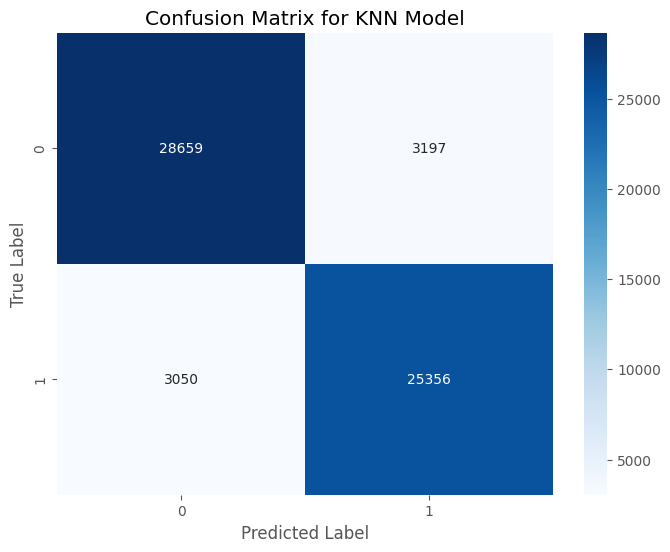

In [73]:
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for KNN Model")
plt.show()

In [77]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

# Calculate Sensitivity (Recall)
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")

Sensitivity (Recall): 0.89
Specificity: 0.90


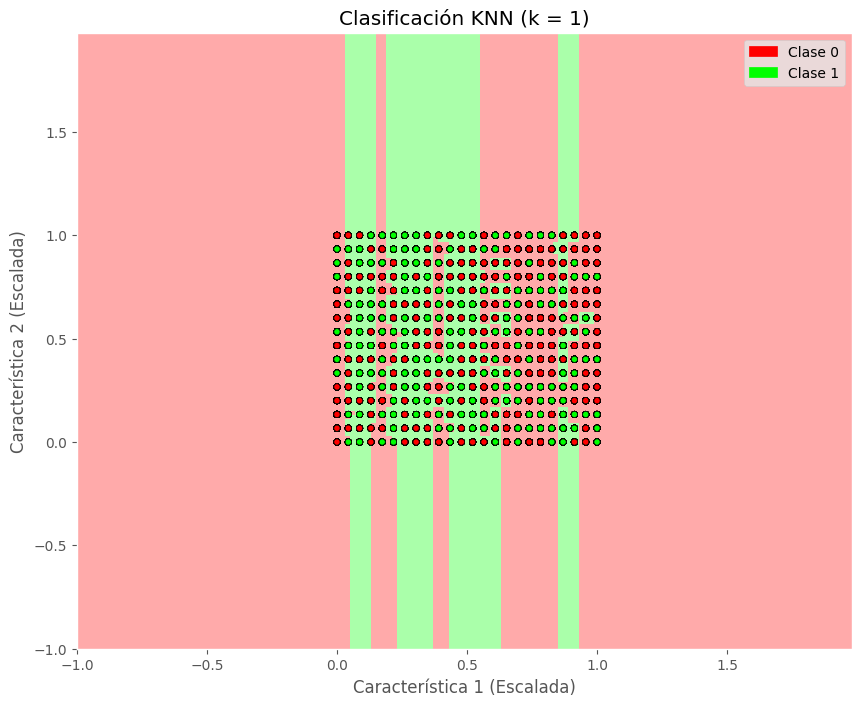

In [81]:
# Crear un mapa de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# Paso de la malla
h = .02

# Rango para las dos primeras features
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Número total de features esperadas por el modelo
n_features = model.n_features_in_

# Construir matriz de inputs con el promedio para el resto de variables
X_grid = np.tile(np.mean(X_test, axis=0), (xx.ravel().shape[0], 1))
X_grid[:, 0] = xx.ravel()
X_grid[:, 1] = yy.ravel()

# Predecir clases
Z = model.predict(X_grid)
Z = Z.reshape(xx.shape)

# Graficar
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.to_numpy().flatten(), cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Clasificación KNN (k = {model.n_neighbors})")
plt.xlabel('Característica 1 (Escalada)')
plt.ylabel('Característica 2 (Escalada)')

# Leyenda
patch_0 = mpatches.Patch(color='#FF0000', label='Clase 0')
patch_1 = mpatches.Patch(color='#00FF00', label='Clase 1')
plt.legend(handles=[patch_0, patch_1])

plt.show()


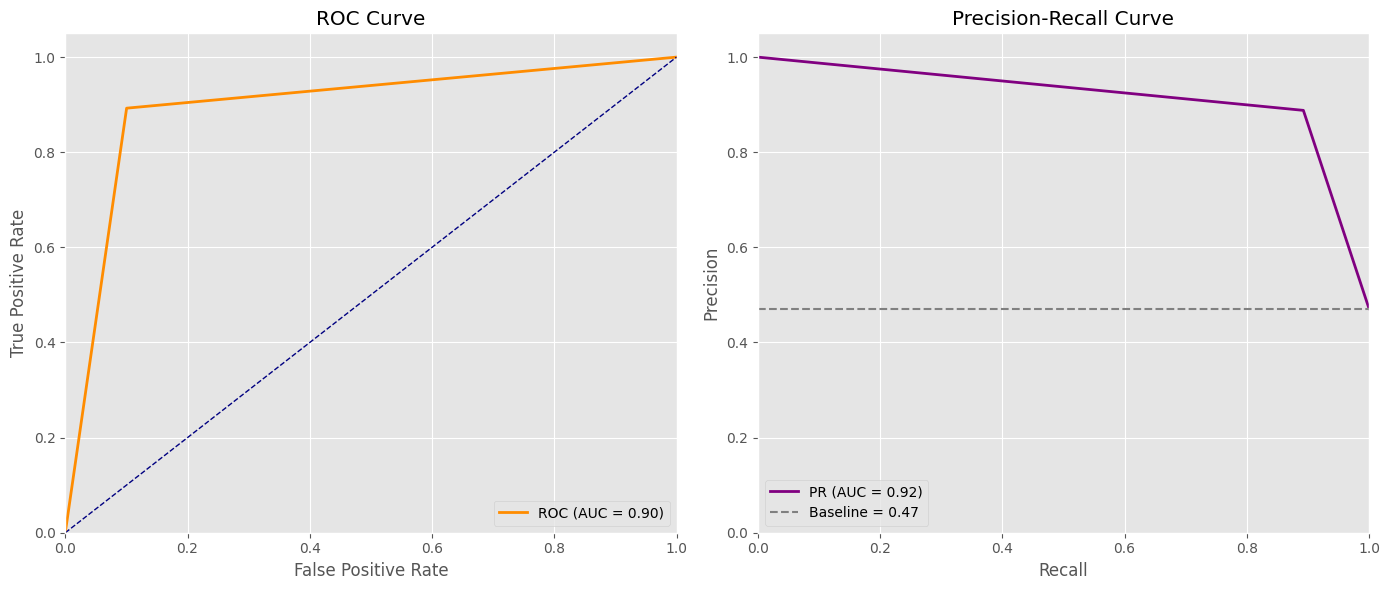

In [87]:
# Graficos ROC y PR para el modelo actual (subplot)
y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

fig2, axs = plt.subplots(1, 2, figsize=(14, 6))

# ROC
axs[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
axs[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC Curve')
axs[0].legend(loc='lower right')

# Precision-Recall
axs[1].plot(recall, precision, color='purple', lw=2, label=f'PR (AUC = {pr_auc:.2f})')
baseline = y_test.mean()
axs[1].hlines(baseline, 0, 1, colors='gray', linestyles='--', label=f'Baseline = {baseline:.2f}')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve')
axs[1].legend(loc='lower left')

plt.tight_layout()
plt.show()

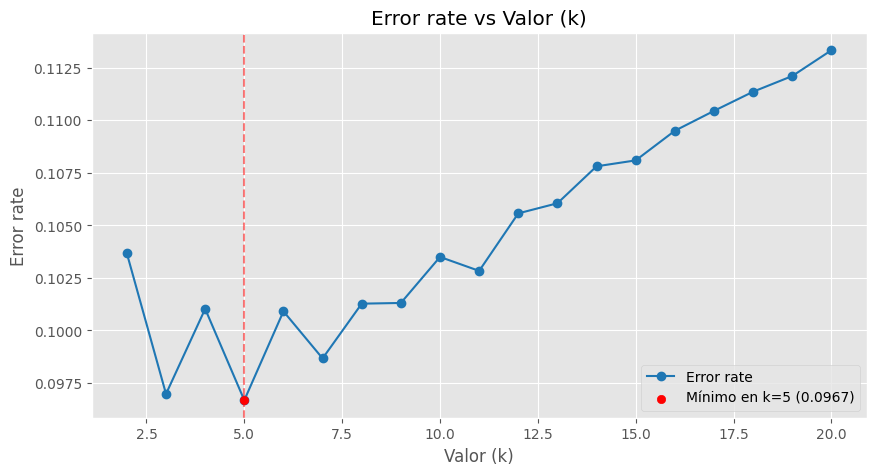

In [89]:
# Grafico de error_rate vs valor de k (asumiendo que error_rate corresponde a k=2..i)
values = np.arange(2, i + 1)  # i está definido en el notebook (20)
err = np.array(error_rate)

# Comprobar tamaños compatibles
if err.shape[0] != values.shape[0]:
    raise ValueError(f"Dimensiones incompatibles: len(error_rate)={err.shape[0]} vs len(values)={values.shape[0]}")

# Encontrar el mejor (mínimo) error
best_idx = err.argmin()
best_k = values[best_idx]
best_err = err[best_idx]

plt.figure(figsize=(10, 5))
plt.plot(values, err, marker='o', linestyle='-', color='tab:blue', label='Error rate')
plt.scatter([best_k], [best_err], color='red', zorder=5, label=f'Mínimo en k={best_k} ({best_err:.4f})')
plt.axvline(best_k, color='red', linestyle='--', alpha=0.5)
plt.xlabel('Valor (k)')
plt.ylabel('Error rate')
plt.title('Error rate vs Valor (k)')
plt.grid(True)
plt.legend()
plt.show()

# GridSearchCV


In [94]:
# GridSearchCV para KNN (usa param_grid ya definido en el notebook)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 21)}

grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    refit=True,
)

grid_search.fit(X_train, y_train)

print("Mejor parámetro:", grid_search.best_params_)
print("Mejor score (cv): {:.4f}".format(grid_search.best_score_))

best_knn = grid_search.best_estimator_
y_pred_gs = best_knn.predict(X_test)

#mensaje de los  resultados de grid search completos

print("ejecución de grid search resultados completos")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejor parámetro: {'n_neighbors': np.int64(4)}
Mejor score (cv): 0.9018
ejecución de grid search resultados completos


In [95]:
#resultados de grid search

print(confusion_matrix(y_test, y_pred_gs))
print(classification_report(y_test, y_pred_gs))

[[30198  1658]
 [ 4168 24238]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     31856
           1       0.94      0.85      0.89     28406

    accuracy                           0.90     60262
   macro avg       0.91      0.90      0.90     60262
weighted avg       0.91      0.90      0.90     60262



# Curva ROC y curva PR usando el modelo de gridsearchCV

ROC AUC (GridSearch best): 0.9579
PR AUC  (GridSearch best): 0.9620


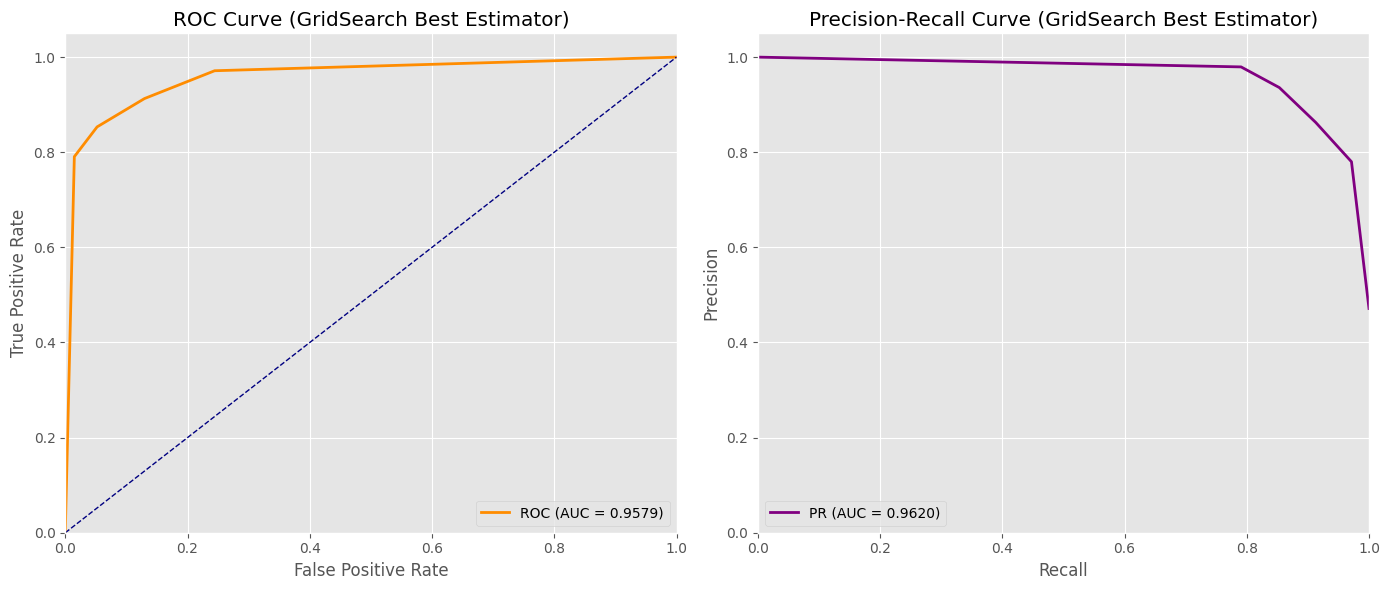

In [97]:
# Curvas ROC y Precision-Recall para el mejor estimador obtenido por GridSearchCV
# (usa best_knn, X_test, y_test ya definidos en el notebook)

try:
    y_proba_gs = best_knn.predict_proba(X_test)[:, 1]
except Exception:
    # fallback si el estimador no tiene predict_proba
    y_proba_gs = best_knn.decision_function(X_test)

# ROC
fpr_gs, tpr_gs, _ = roc_curve(y_test, y_proba_gs)
roc_auc_gs = auc(fpr_gs, tpr_gs)

# Precision-Recall
precision_gs, recall_gs, _ = precision_recall_curve(y_test, y_proba_gs)
pr_auc_gs = auc(recall_gs, precision_gs)

print(f"ROC AUC (GridSearch best): {roc_auc_gs:.4f}")
print(f"PR AUC  (GridSearch best): {pr_auc_gs:.4f}")

# Graficar ambas curvas lado a lado
fig_gs, axs_gs = plt.subplots(1, 2, figsize=(14, 6))

# ROC
axs_gs[0].plot(fpr_gs, tpr_gs, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc_gs:.4f})')
axs_gs[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
axs_gs[0].set_xlim([0.0, 1.0])
axs_gs[0].set_ylim([0.0, 1.05])
axs_gs[0].set_xlabel('False Positive Rate')
axs_gs[0].set_ylabel('True Positive Rate')
axs_gs[0].set_title('ROC Curve (GridSearch Best Estimator)')
axs_gs[0].legend(loc='lower right')

# Precision-Recall
axs_gs[1].plot(recall_gs, precision_gs, color='purple', lw=2, label=f'PR (AUC = {pr_auc_gs:.4f})')
axs_gs[1].set_xlim([0.0, 1.0])
axs_gs[1].set_ylim([0.0, 1.05])
axs_gs[1].set_xlabel('Recall')
axs_gs[1].set_ylabel('Precision')
axs_gs[1].set_title('Precision-Recall Curve (GridSearch Best Estimator)')
axs_gs[1].legend(loc='lower left')

plt.tight_layout()
plt.show()


# Conclusiones

## Rendimiento
El modelo KNN con k=1 demuestra un alto poder predictivo (90% exactitud en prueba) para determinar victorias en Rainbow Six Siege, utilizando características clave del juego como arma principal, mapa, modo de juego y estadísticas de rendimiento. La diferencia entre el 98% de exactitud en entrenamiento y 90% en prueba indica un ligero sobreajuste, característico de k=1 donde el modelo puede memorizar patrones específicos en lugar de generalizar completamente.

##  Balance
Las métricas muestran un equilibrio notable:

Clase 0 (Derrota): 90% precisión, 90% recall

Clase 1 (Victoria): 89% precisión, 89% recall

Esta simetría en las métricas indica que el modelo no tiene sesgo hacia ninguna clase en particular y sugiere que el dataset está naturalmente balanceado, con una distribución equitativa entre partidas ganadas y perdidas.

##  Matriz de confusion:
La matriz revela:

25,356 aciertos en victorias (89% sensibilidad)

28,659 aciertos en derrotas (90% especificidad)

Solo 6,247 errores totales frente a 54,015 aciertos

La visualización mediante heatmap confirma esta robustez, mostrando colores intensos en la diagonal principal (aciertos) y tonalidades suaves en las celdas de error, lo que refleja la capacidad predictiva consistente del modelo across ambas clases.

##  Potencial de Implementación
El modelo demuestra ser suficientemente confiable para aplicaciones prácticas en análisis de gameplay, pudiendo integrarse en sistemas de recomendación para jugadores o herramientas de análisis táctico. La consistencia en las métricas sugiere que las características seleccionadas capturan efectivamente los patrones determinantes para el resultado de las partidas.